## Linear model classifiers
***

In [5]:
import os
import sys
sys.path.append('../')

from sklearn import datasets

import numpy as np

import matplotlib.pyplot as plt

from utils.misc import Plot
from utils.metrics import accuracy_score
from utils.data import StandardScaler, train_test_split
from deep_learning.activation_functions import Sigmoid, Softmax
from supervised_learning.linear_models.linear_classifiers import SoftmaxRegression, RidgeClassifier

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
data = datasets.load_iris()

X = data.data
y = data.target

y_SR = np.copy(y)
y_RC = np.copy(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, seed=1)  # Complete dataset

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
class_weights = {0: 1.0, 1: 1.0, 2: 1.0}

SR_clf = SoftmaxRegression(solver='gradient_descent', class_weights=class_weights)
SR_clf.fit(X_train, y_train)
y_pred_SR = SR_clf.predict(X_test)

# RR_clf = RidgeClassifier(reg_factor=0.01, solver='gradient_descent')
# RR_clf.fit(X_train_RR, y_train_RR)
# y_pred_RR = RR_clf.predict(X_test_RR)


In [16]:
accuracy_SR = accuracy_score(y_test, y_pred_SR)
print("Accuracy SR: ", accuracy_SR)

Accuracy SR:  0.9387755102040817


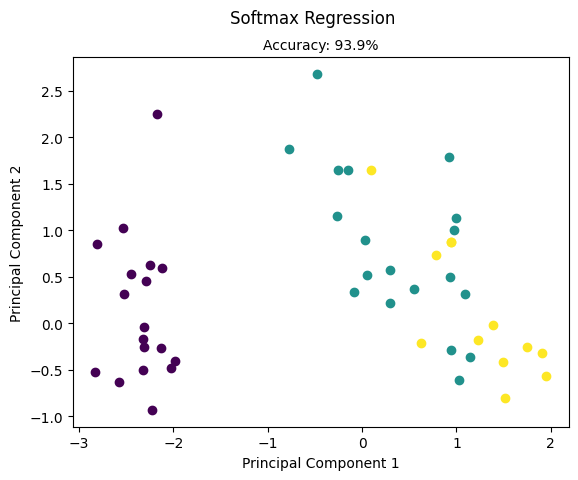

In [17]:
Plot().plot_in_2d(X_test, y_pred_SR, title="Softmax Regression", accuracy=accuracy_SR)